In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
##########################
# pA Testing Starts Here #
##########################

In [3]:
monthly_pA = pd.read_csv('Resources/monthly_pA.csv',index_col=False)

In [4]:
monthly_pA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 5 columns):
year_month               218 non-null int64
average_exhaustion       218 non-null float64
average_sA               218 non-null float64
number_extract_points    218 non-null float64
average_pA               218 non-null float64
dtypes: float64(4), int64(1)
memory usage: 8.6 KB


In [5]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = monthly_pA[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pA['average_pA'].values.reshape(-1,1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [7]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [10]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [11]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [12]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.692, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.645, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.412, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.555, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.621, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.692, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.001}
0.5849574769448976


In [14]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [15]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.207, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.223, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.192, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.249, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.244, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.651, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.647, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.452, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.570, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.598, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.1 ...................................
[CV] .

[CV] .... C=10, epsilon=0.001, gamma=0.001, score=0.426, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.001 ................................
[CV] .... C=10, epsilon=0.001, gamma=0.001, score=0.569, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.001 ................................
[CV] .... C=10, epsilon=0.001, gamma=0.001, score=0.590, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.01 .................................
[CV] ..... C=10, epsilon=0.001, gamma=0.01, score=0.717, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.01 .................................
[CV] ..... C=10, epsilon=0.001, gamma=0.01, score=0.697, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.01 .................................
[CV] ..... C=10, epsilon=0.001, gamma=0.01, score=0.567, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.01 .................................
[CV] ..... C=10, epsilon=0.001, gamma=0.01, score=0.597, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.01 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.1s finished
C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [16]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 5, 'epsilon': 0.1, 'gamma': 0.1}
0.7075635338928986


In [17]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [18]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.102, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.075, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.012, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.004, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.022, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.084, total=   0

[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.460, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.102, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.076, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.012, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.004, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.022, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.01, score=-0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.022, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.216, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.365, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.239, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.101, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.129, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[C

[CV]  C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.01, score=0.448, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.01, score=0.565, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.01, score=0.622, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.1, score=0.743, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.1, score=0.688, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.1, score=0.605, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=2, epsilon=0.1, ga

[CV]  C=1, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.1, score=0.633, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.1, score=0.642, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.1, score=0.714, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001, score=0.687, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001, score=0.658, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001, score=0.468, total=   0.0s
[CV] C=1, coef0=3.082453301198996, degree=4, 

[CV]  C=5, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.213, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.092, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.066, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.003, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.004, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.006, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.001, tota

[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.140, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.161, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.224, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.102, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.076, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.012, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.004,

[CV]  C=5, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1, score=0.786, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1 .
[CV]  C=5, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1, score=0.728, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1 .
[CV]  C=5, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1, score=0.656, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1 .
[CV]  C=5, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1, score=0.633, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1 .
[CV]  C=5, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1, score=0.716, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001, score=0.672, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=2, epsilon=0.1

[CV]  C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.001, score=0.692, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.001, score=0.652, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.001, score=0.439, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.001, score=0.567, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.001, score=0.623, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.01 .
[CV]  C=5, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.01, score=0.725, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=3, epsilon

[CV]  C=5, coef0=3.082453301198996, degree=4, epsilon=0.1, gamma=0.1, score=0.642, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=4, epsilon=0.1, gamma=0.1 ..
[CV]  C=5, coef0=3.082453301198996, degree=4, epsilon=0.1, gamma=0.1, score=0.668, total=   0.0s
[CV] C=5, coef0=3.082453301198996, degree=4, epsilon=0.1, gamma=0.1 ..
[CV]  C=5, coef0=3.082453301198996, degree=4, epsilon=0.1, gamma=0.1, score=0.677, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.100, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.073, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.011, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, d

[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=0.010, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=0.013, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.002, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.631, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.228, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=-0.027, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.

[CV]  C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.011, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.003, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.021, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.306, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=-0.621, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=-0.365, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.196,

[CV]  C=10, coef0=3.082453301198996, degree=2, epsilon=0.01, gamma=0.1, score=0.720, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001, score=0.681, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001, score=0.654, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001, score=0.442, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001, score=0.563, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=3.082453301198996, degree=2, epsilon=0.1, gamma=0.001, score=0.619, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degre

[CV]  C=10, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.1, score=0.666, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.1 .
[CV]  C=10, coef0=3.082453301198996, degree=3, epsilon=0.1, gamma=0.1, score=0.710, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001, score=0.704, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001, score=0.640, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001, score=0.496, total=   0.0s
[CV] C=10, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.082453301198996, degree=4, epsilon=0.001, gamma=0.001, score=0.568, total=   0.0s
[CV] C=10, coef0=3.0824533011

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    2.2s finished
C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 3.082453301198996],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [19]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 5, 'coef0': 3.082453301198996, 'degree': 2, 'epsilon': 0.001, 'gamma': 0.1}
0.7058433437846523


RBF SVR yielded the best results at 0.708 while polynomial (2nd degree) was a close second at 0.706. Both have greater scores than the OLS model at 0.656. RBF will be used for Monthly pA regression

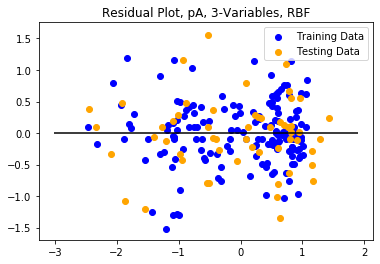

In [20]:
# Plot pA residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=5, gamma=0.1, epsilon=0.1)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
fig,ax1 = plt.subplots()
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pA, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pA_rbf_residual.png', dpi=96)
plt.show()

In [21]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [22]:
model = SVR(kernel='rbf', C=5, gamma=0.1, epsilon=0.1)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [23]:
monthly_pA['Predicted_pA'] = y_predicted
monthly_pA['Error'] = monthly_pA['Predicted_pA'] - monthly_pA['average_pA']
monthly_pA.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pA,Predicted_pA,Error
0,200201,25.46,0.219,74.0,0.214,0.210918,-0.003082
1,200202,29.85,0.221,61.0,0.206,0.214236,0.008236
2,200203,30.10,0.229,67.0,0.230,0.222176,-0.007824
3,200204,31.33,0.241,75.0,0.215,0.233734,0.018734
4,200205,37.39,0.235,79.0,0.205,0.232721,0.027721


In [24]:
# Get a datetime column
from datetime import datetime
monthly_pA['year_month'] = monthly_pA['year_month'].astype(str)
datetime_list = []
for i in range(len(monthly_pA)):
    datetime_list.append(datetime.strptime(monthly_pA['year_month'][i],'%Y%m'))

In [25]:
monthly_pA['datetime'] = datetime_list
monthly_pA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 8 columns):
year_month               218 non-null object
average_exhaustion       218 non-null float64
average_sA               218 non-null float64
number_extract_points    218 non-null float64
average_pA               218 non-null float64
Predicted_pA             218 non-null float64
Error                    218 non-null float64
datetime                 218 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 13.8+ KB


C:\Users\Adrianna\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


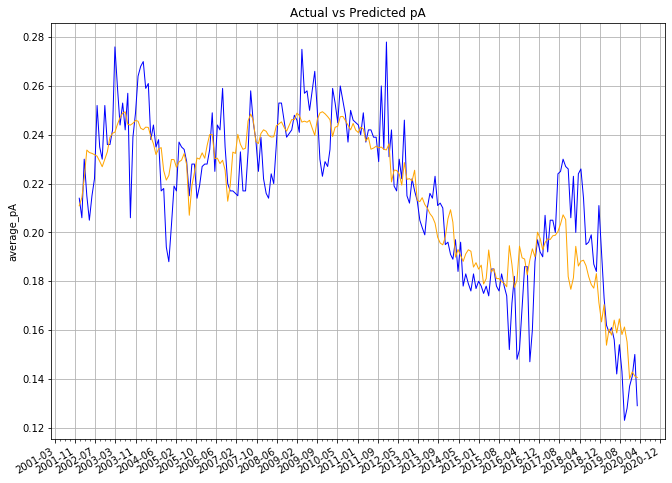

In [26]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(monthly_pA['datetime'],monthly_pA['average_pA'],c='blue',linewidth = 1)
ax1.plot(monthly_pA['datetime'],monthly_pA['Predicted_pA'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('average_pA')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pA')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/monthly_pA_rbf.png', dpi=100)
plt.show()

In [27]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(monthly_pA['average_pA'],monthly_pA['Predicted_pA'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 0.00025716316737694296
the R2 Score for the multivariate, RBF regression: 0.7527680461523516


In [28]:
##########################
# pB Testing Starts Here #
##########################

In [29]:
monthly_pB = pd.read_csv('Resources/monthly_pB.csv',index_col=False)

In [30]:
monthly_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
year_month               128 non-null int64
average_exhaustion       128 non-null float64
average_sA               128 non-null float64
number_extract_points    128 non-null float64
average_pB               128 non-null float64
dtypes: float64(4), int64(1)
memory usage: 5.1 KB


In [31]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = monthly_pB[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pB['average_pB'].values.reshape(-1,1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [33]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [34]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [35]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [36]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [37]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [38]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.252, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.814, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.526, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.803, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.661, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.252, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished
C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [39]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 10, 'gamma': 0.001}
0.609052130966795


In [40]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [41]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.129, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.236, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.091, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.108, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.257, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.401, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, epsilon=0.1, gamma=0.1, score=0.602, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.1 .....................................
[CV] ......... C=1, epsilon=0.1, gamma=0.1, score=0.887, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.1 .....................................
[CV] ......... C=1, epsilon=0.1, gamma=0.1, score=0.752, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.1 .....................................
[CV] ......... C=1, epsilon=0.1, gamma=0.1, score=0.696, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.1 .....................................
[CV] ......... C=1, epsilon=0.1, gamma=0.1, score=0.841, total=   0.0s
[CV] C=5, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=5, epsilon=0.001, gamma=0.001, score=0.388, total=   0.0s
[CV] C=5, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=5, epsilon=0.001, gamma=0.001, score=0.616, total=   0.0s
[CV] C=5, epsilon=0.001, gamma=0.001 .................................
[CV] .

[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.512, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.677, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.713, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.402, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.855, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.584, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.757, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.1s finished
C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [42]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 1, 'epsilon': 0.01, 'gamma': 0.1}
0.7654411218333496


In [43]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [44]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.094, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.023, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.092, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.097, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.011, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.093, total=   0

[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.094, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.020, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.087, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.094, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.012, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=-0.080, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.207, tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.069, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.001, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.104, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.003, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.103, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.069, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.001, tota

[CV]  C=1, coef0=2.9773759060379503, degree=4, epsilon=0.001, gamma=0.1, score=0.517, total=   0.0s
[CV] C=1, coef0=2.9773759060379503, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=2.9773759060379503, degree=4, epsilon=0.001, gamma=0.1, score=0.809, total=   0.0s
[CV] C=1, coef0=2.9773759060379503, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=2.9773759060379503, degree=4, epsilon=0.01, gamma=0.001, score=0.305, total=   0.0s
[CV] C=1, coef0=2.9773759060379503, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=2.9773759060379503, degree=4, epsilon=0.01, gamma=0.001, score=0.817, total=   0.0s
[CV] C=1, coef0=2.9773759060379503, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=2.9773759060379503, degree=4, epsilon=0.01, gamma=0.001, score=0.516, total=   0.0s
[CV] C=1, coef0=2.9773759060379503, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=2.9773759060379503, degree=4, epsilon=0.01, gamma=0.001, score=0.788, total=   0.0s
[CV] C=1, coef0=2.97737590603795

[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.022, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.092, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.097, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.011, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.027, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.281, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.065,

[CV]  C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.01, score=0.830, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.01, score=0.558, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.01, score=0.803, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.01, score=0.690, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.1, score=0.517, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=2.9773759060379503, degree=2, epsilon=0.01, gamma=0.1, score=0.838, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=2

[CV]  C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.01, score=0.652, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.01 
[CV]  C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.01, score=0.805, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.01 
[CV]  C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.01, score=0.771, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.1 .
[CV]  C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.1, score=0.584, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.1 .
[CV]  C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.1, score=0.792, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.1 .
[CV]  C=5, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.1, score=0.703, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=3, epsilon=

[CV]  C=5, coef0=2.9773759060379503, degree=4, epsilon=0.1, gamma=0.1, score=0.783, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=4, epsilon=0.1, gamma=0.1 .
[CV]  C=5, coef0=2.9773759060379503, degree=4, epsilon=0.1, gamma=0.1, score=0.710, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=4, epsilon=0.1, gamma=0.1 .
[CV]  C=5, coef0=2.9773759060379503, degree=4, epsilon=0.1, gamma=0.1, score=0.581, total=   0.0s
[CV] C=5, coef0=2.9773759060379503, degree=4, epsilon=0.1, gamma=0.1 .
[CV]  C=5, coef0=2.9773759060379503, degree=4, epsilon=0.1, gamma=0.1, score=0.802, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.094, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.022, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.001 .............
[CV]  C=

[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.103, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.069, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.001, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.104, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.003, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.103, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.06

[CV]  C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.001, score=0.311, total=   0.0s
[CV] C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.001, score=0.819, total=   0.0s
[CV] C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.001, score=0.539, total=   0.0s
[CV] C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.001, score=0.799, total=   0.0s
[CV] C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.001, score=0.677, total=   0.0s
[CV] C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.01 
[CV]  C=10, coef0=2.9773759060379503, degree=3, epsilon=0.1, gamma=0.01, score=0.578, total=   0.0s
[CV] C=10, coef0=2.977375906037

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    1.6s finished
C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 2.9773759060379503],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [45]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 1, 'coef0': 2.9773759060379503, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1}
0.7458895870480435


RBF SVR yielded the best results at 0.762 while polynomial (4th degree) was a close second at 0.745. Both have significantly greater scores than the OLS model at 0.616. RBF will be used for Monthly pB regression

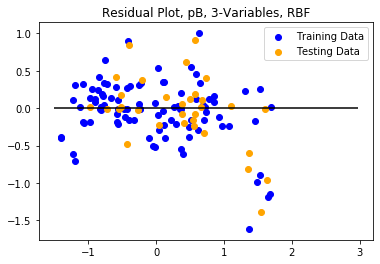

In [46]:
# Plot pB residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.01)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pB, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pB_rbf_residual.png', dpi=96)
plt.show()

In [47]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [48]:
model = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.01)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [49]:
monthly_pB['Predicted_pB'] = y_predicted
monthly_pB['Error'] = monthly_pB['Predicted_pB'] - monthly_pB['average_pB']
monthly_pB.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pB,Predicted_pB,Error
0,200908,45.33,0.238,152.0,1.464125,1.396070,-0.068055
1,200909,46.52,0.234,141.0,1.472000,1.476967,0.004967
2,200910,42.35,0.230,174.0,1.319250,1.234518,-0.084732
3,200911,37.27,0.226,215.0,1.285053,1.002151,-0.282902
4,200912,35.62,0.224,201.0,1.344667,1.012965,-0.331701


In [50]:
# Get a datetime column
from datetime import datetime
monthly_pB['year_month'] = monthly_pB['year_month'].astype(str)
datetime_list = []
for i in range(len(monthly_pB)):
    datetime_list.append(datetime.strptime(monthly_pB['year_month'][i],'%Y%m'))

In [51]:
monthly_pB['datetime'] = datetime_list
monthly_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
year_month               128 non-null object
average_exhaustion       128 non-null float64
average_sA               128 non-null float64
number_extract_points    128 non-null float64
average_pB               128 non-null float64
Predicted_pB             128 non-null float64
Error                    128 non-null float64
datetime                 128 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 8.1+ KB


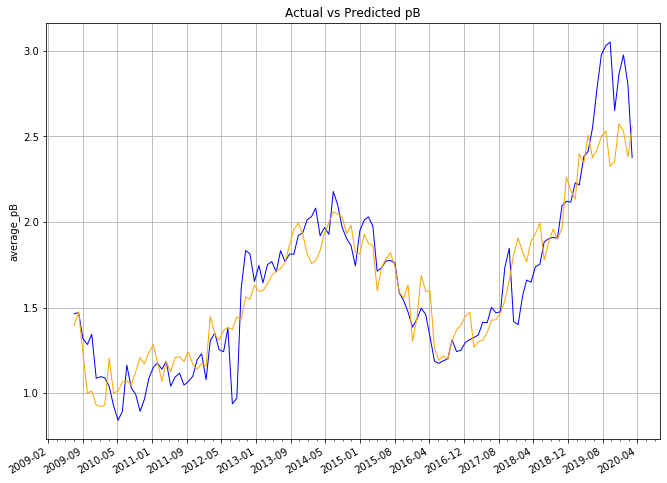

In [52]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(monthly_pB['datetime'],monthly_pB['average_pB'],c='blue',linewidth = 1)
ax1.plot(monthly_pB['datetime'],monthly_pB['Predicted_pB'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('average_pB')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pB')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/monthly_pB_rbf.png', dpi=100)
plt.show()

In [53]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(monthly_pB['average_pB'],monthly_pB['Predicted_pB'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 0.03576188347757017
the R2 Score for the multivariate, RBF regression: 0.8579249424657527


In [54]:
##########################
# pD Testing Starts Here #
##########################

In [55]:
monthly_pD = pd.read_csv('Resources/monthly_pD.csv',index_col=False)

In [56]:
monthly_pD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
year_month               128 non-null int64
average_exhaustion       128 non-null float64
average_sA               128 non-null float64
number_extract_points    128 non-null float64
average_pD               128 non-null float64
dtypes: float64(4), int64(1)
memory usage: 5.1 KB


In [57]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = monthly_pD[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pD['average_pD'].values.reshape(-1,1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [59]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [60]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [61]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [62]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [63]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [64]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.120, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................... C=1, gamma=0.001, score=-0.855, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................... C=1, gamma=0.001, score=-1.215, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................... C=1, gamma=0.001, score=-4.184, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.270, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.120, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished
C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [65]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.001}
-1.1593225478085838


In [66]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [67]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.142, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.182, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.480, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.998, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.130, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ..... C=1, epsilon=0.001, gamma=0.01, score=-0.080, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ..... C=1,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] ...... C=1, epsilon=0.1, gamma=0.001, score=-0.107, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] ...... C=1, epsilon=0.1, gamma=0.001, score=-0.156, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] ...... C=1, epsilon=0.1, gamma=0.001, score=-0.447, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] ...... C=1, epsilon=0.1, gamma=0.001, score=-0.994, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] ...... C=1, epsilon=0.1, gamma=0.001, score=-0.102, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.01 ....................................
[CV] ....... C=1, epsilon=0.1, gamma=0.01, score=-0.012, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.01 ....................................
[CV] ....... C=1, epsilon=0.1, gamma=0.01, score=-0.165, total=   0.0s
[CV] 

[CV] C=10, epsilon=0.001, gamma=0.01 .................................
[CV] ..... C=10, epsilon=0.001, gamma=0.01, score=0.223, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.1 ..................................
[CV] ...... C=10, epsilon=0.001, gamma=0.1, score=0.376, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.1 ..................................
[CV] ...... C=10, epsilon=0.001, gamma=0.1, score=0.709, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.1 ..................................
[CV] ...... C=10, epsilon=0.001, gamma=0.1, score=0.294, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.1 ..................................
[CV] ...... C=10, epsilon=0.001, gamma=0.1, score=0.469, total=   0.0s
[CV] C=10, epsilon=0.001, gamma=0.1 ..................................
[CV] ...... C=10, epsilon=0.001, gamma=0.1, score=0.358, total=   0.0s
[CV] C=10, epsilon=0.01, gamma=0.001 .................................
[CV] .... C=10, epsilon=0.01, gamma=0.001, score=-0.083, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.1s finished
C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [68]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.001, 'gamma': 0.1}
0.4405158856597608


In [69]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [70]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.145, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.161, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.447, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-1.030, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.147, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.134, total=   0

[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.982, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.139, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=-0.097, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=-0.231, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=-0.402, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=-0.904, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=-0.032, total=   0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=-0.308, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=-0.704, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=-0.062, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.134, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.166, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.447, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.982, tot

[CV]  C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.01, score=-3.187, total=   0.0s
[CV] C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.01, score=0.259, total=   0.0s
[CV] C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.1, score=0.176, total=   0.0s
[CV] C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.1, score=0.521, total=   0.0s
[CV] C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.1, score=0.034, total=   0.0s
[CV] C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.1 ..
[CV]  C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.1, score=0.553, total=   0.0s
[CV] C=1, coef0=2.685951439220815, degree=3, epsilon=0.1, ga

[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.982, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.139, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.132, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.167, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.442, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.982, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.139, total

[CV]  C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.001, score=-0.027, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.001, score=-0.259, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.001, score=-0.743, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.001, score=-1.616, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.001, score=0.014, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=5, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.01, score=0.130, total=   0.0s
[CV] C=5, coef0=2.685951439

[CV]  C=5, coef0=2.685951439220815, degree=3, epsilon=0.01, gamma=0.1, score=0.256, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001, score=0.124, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001, score=-0.565, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001, score=-0.929, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001, score=-3.204, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=5, coef0=2.685951439220815, degree=3, epsilon=0.1, gamma=0.001, score=0.207, total=   0.0s
[CV] C=5, coef0=2.685951439220815, degree=3, epsi

[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.326, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.799, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.077, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1, score=0.055, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1, score=-0.309, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1, score=-0.041, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.001, gamma=0.1, score

[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.447, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-1.030, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.147, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01, score=-0.145, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01, score=-0.162, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01, score=-0.446, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.01, gamma=0.01, scor

[CV]  C=10, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.1, score=0.093, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.1, score=0.472, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.1, score=-0.060, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.1, score=0.582, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.685951439220815, degree=2, epsilon=0.001, gamma=0.1, score=0.193, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=2.685951439220815, degree=2, epsilon=0.01, gamma=0.001, score=0.086, total=   0.0s
[CV] C=10, coef0=2.685951439220815, d

[CV]  C=10, coef0=2.685951439220815, degree=4, epsilon=0.001, gamma=0.1, score=0.413, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.685951439220815, degree=4, epsilon=0.001, gamma=0.1, score=-2.528, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=2.685951439220815, degree=4, epsilon=0.001, gamma=0.1, score=0.310, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=2.685951439220815, degree=4, epsilon=0.01, gamma=0.001, score=0.145, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=2.685951439220815, degree=4, epsilon=0.01, gamma=0.001, score=-0.803, total=   0.0s
[CV] C=10, coef0=2.685951439220815, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=2.685951439220815, degree=4, epsilon=0.01, gamma=0.001, score=-1.124, total=   0.0s
[CV] C=10, coef0=2.685951439220

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:    1.3s finished
C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 2.685951439220815],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [71]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 1, 'coef0': 2.685951439220815, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.1}
0.3075407206162225


RBF SVR yielded the best results at 0.440 and is significantly greater than the OLS model at 0.182. RBF will be used for Monthly pD regression

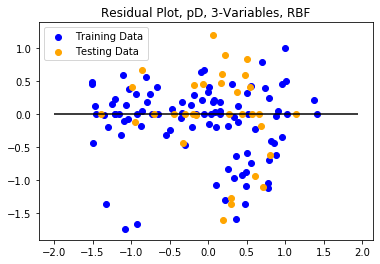

In [72]:
# Plot pD residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.001)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pD, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pD_rbf_residual.png', dpi=96)
plt.show()

In [73]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [74]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.001)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [75]:
monthly_pD['Predicted_pD'] = y_predicted
monthly_pD['Error'] = monthly_pD['Predicted_pD'] - monthly_pD['average_pD']
monthly_pD.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pD,Predicted_pD,Error
0,200908,45.33,0.238,152.0,0.017667,0.017671,0.000004
1,200909,46.52,0.234,141.0,0.018667,0.017120,-0.001546
2,200910,42.35,0.230,174.0,0.015900,0.013292,-0.002608
3,200911,37.27,0.226,215.0,0.016556,0.010342,-0.006214
4,200912,35.62,0.224,201.0,0.016238,0.009841,-0.006397


In [76]:
# Get a datetime column
from datetime import datetime
monthly_pD['year_month'] = monthly_pD['year_month'].astype(str)
datetime_list = []
for i in range(len(monthly_pD)):
    datetime_list.append(datetime.strptime(monthly_pD['year_month'][i],'%Y%m'))

In [77]:
monthly_pD['datetime'] = datetime_list
monthly_pD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
year_month               128 non-null object
average_exhaustion       128 non-null float64
average_sA               128 non-null float64
number_extract_points    128 non-null float64
average_pD               128 non-null float64
Predicted_pD             128 non-null float64
Error                    128 non-null float64
datetime                 128 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 8.1+ KB


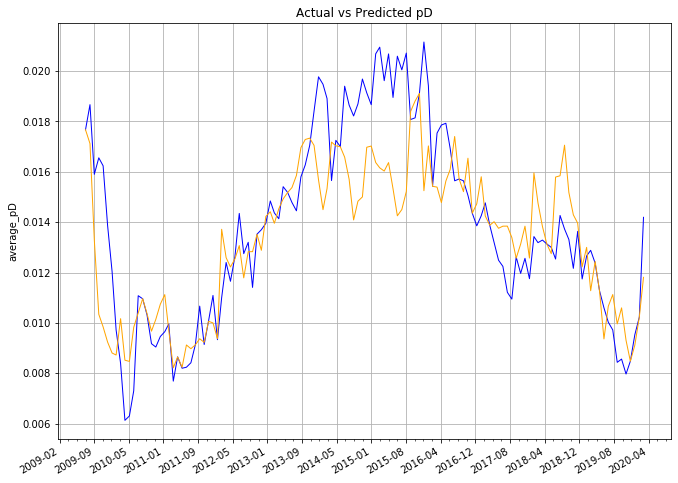

In [78]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(monthly_pD['datetime'],monthly_pD['average_pD'],c='blue',linewidth = 1)
ax1.plot(monthly_pD['datetime'],monthly_pD['Predicted_pD'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('average_pD')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pD')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/monthly_pD_rbf.png', dpi=100)
plt.show()

In [79]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(monthly_pD['average_pD'],monthly_pD['Predicted_pD'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 5.0635635633009645e-06
the R2 Score for the multivariate, RBF regression: 0.6434007868457741


In [80]:
# Considering there are timeframes of higher errors, we will plot the independent variables below the actual/predictions
# they may have been somewhat of outliers during that time

In [81]:
monthly_pA.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pA,Predicted_pA,Error,datetime
0,200201,25.46,0.219,74.0,0.214,0.210918,-0.003082,2002-01-01
1,200202,29.85,0.221,61.0,0.206,0.214236,0.008236,2002-02-01
2,200203,30.10,0.229,67.0,0.230,0.222176,-0.007824,2002-03-01
3,200204,31.33,0.241,75.0,0.215,0.233734,0.018734,2002-04-01
4,200205,37.39,0.235,79.0,0.205,0.232721,0.027721,2002-05-01


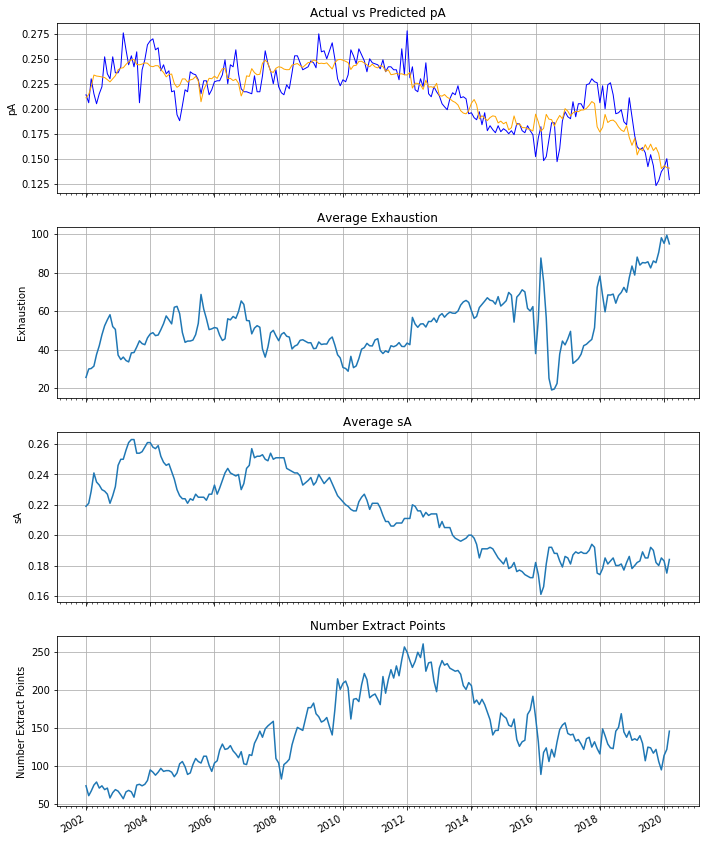

In [82]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True)
ax1.plot(monthly_pA['datetime'],monthly_pA['average_pA'],c='blue',linewidth = 1)
ax1.plot(monthly_pA['datetime'],monthly_pA['Predicted_pA'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pA')

ax2.plot(monthly_pA['datetime'],monthly_pA['average_exhaustion'])
ax2.set_ylabel('Exhaustion')
ax3.plot(monthly_pA['datetime'],monthly_pA['average_sA'])
ax3.set_ylabel('sA')
ax4.plot(monthly_pA['datetime'],monthly_pA['number_extract_points'])
ax4.set_ylabel('Number Extract Points')


fig.autofmt_xdate()
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.set_title('Actual vs Predicted pA')
ax2.set_title('Average Exhaustion')
ax3.set_title('Average sA')
ax4.set_title('Number Extract Points')
fig.set_size_inches(11.5, 16)
fig.savefig('Images/monthly_pA_variables.png', dpi=100)
plt.show()

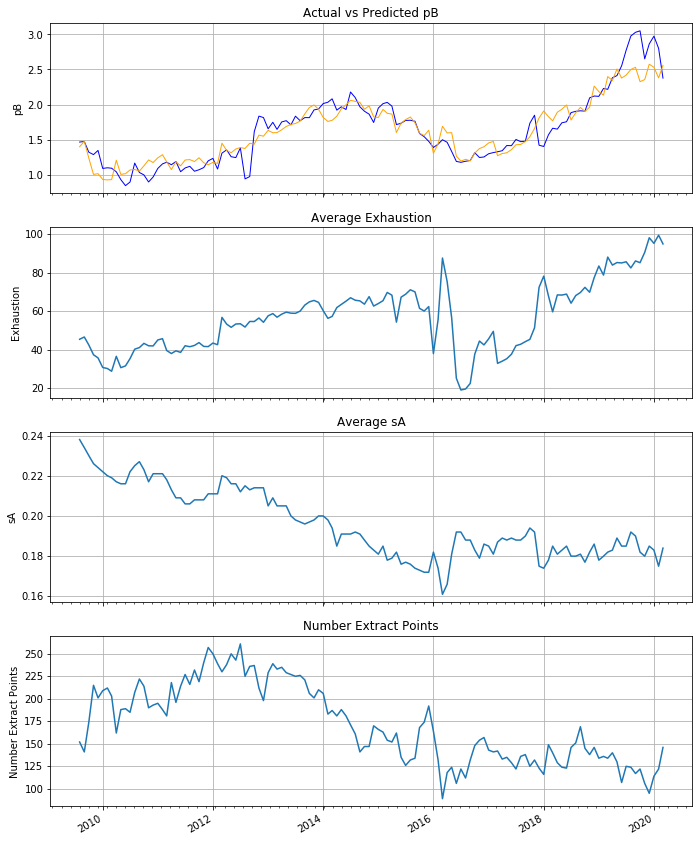

In [83]:
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True)
ax1.plot(monthly_pB['datetime'],monthly_pB['average_pB'],c='blue',linewidth = 1)
ax1.plot(monthly_pB['datetime'],monthly_pB['Predicted_pB'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pB')

ax2.plot(monthly_pB['datetime'],monthly_pB['average_exhaustion'])
ax2.set_ylabel('Exhaustion')
ax3.plot(monthly_pB['datetime'],monthly_pB['average_sA'])
ax3.set_ylabel('sA')
ax4.plot(monthly_pB['datetime'],monthly_pB['number_extract_points'])
ax4.set_ylabel('Number Extract Points')


fig.autofmt_xdate()
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.set_title('Actual vs Predicted pB')
ax2.set_title('Average Exhaustion')
ax3.set_title('Average sA')
ax4.set_title('Number Extract Points')
fig.set_size_inches(11.5, 16)
fig.savefig('Images/monthly_pB_variables.png', dpi=100)
plt.show()

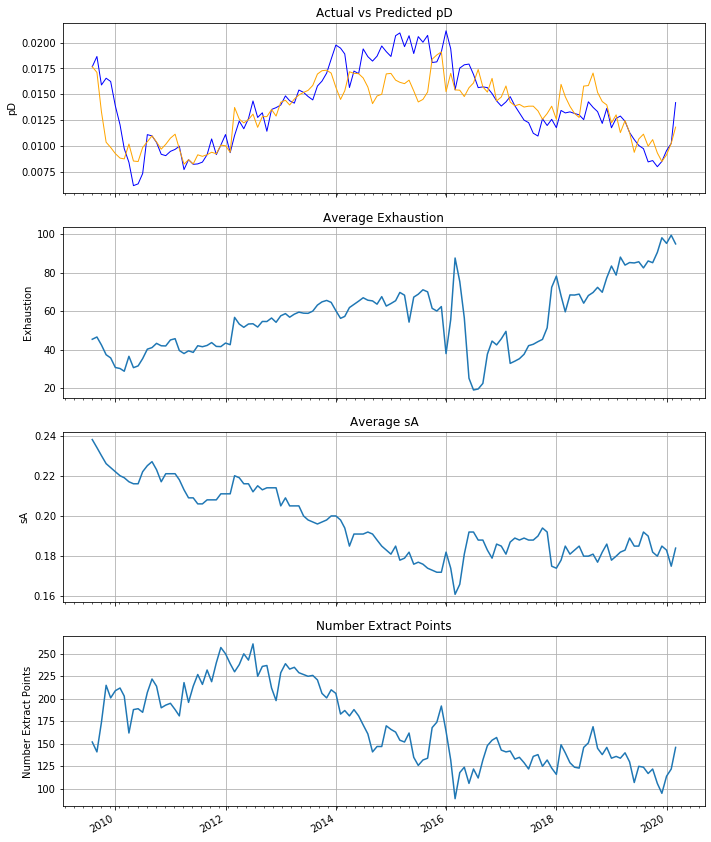

In [84]:
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True)
ax1.plot(monthly_pD['datetime'],monthly_pD['average_pD'],c='blue',linewidth = 1)
ax1.plot(monthly_pD['datetime'],monthly_pD['Predicted_pD'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pD')

ax2.plot(monthly_pD['datetime'],monthly_pD['average_exhaustion'])
ax2.set_ylabel('Exhaustion')
ax3.plot(monthly_pD['datetime'],monthly_pD['average_sA'])
ax3.set_ylabel('sA')
ax4.plot(monthly_pD['datetime'],monthly_pD['number_extract_points'])
ax4.set_ylabel('Number Extract Points')


fig.autofmt_xdate()
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax1.set_title('Actual vs Predicted pD')
ax2.set_title('Average Exhaustion')
ax3.set_title('Average sA')
ax4.set_title('Number Extract Points')
fig.set_size_inches(11.5, 16)
fig.savefig('Images/monthly_pD_variables.png', dpi=100)
plt.show()